In [1]:
import datetime
import numpy as np
import pandas as pd
from yahoo_finance_api import YahooFinance as yf
import matplotlib.pyplot as plt

### Get the stock data
* Here we can set the range of data and interval of data, for this example, we have used 5 year range and closing price at the end of the day

In [2]:
stock_symbols = ['TCS.NS', 'RELIANCE.NS', 'GAIL.NS', 'MARUTI.NS', 'BAJAJ-AUTO.NS', 
                 'ASIANPAINT.NS', 'GSKCONS.NS', 'DIAMINESQ.BO', 'SWISSGLA.BO', 'IOLCP.NS',
                 'CALCOM.BO']

my_stocks = pd.DataFrame()
for i in range(len(stock_symbols)):
    my_stocks[stock_symbols[i]] = yf(stock_symbols[i], result_range='5y', interval='1d', dropna='True').result['Close']
my_stocks

C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\yahoo_finance_api-0.0.1-py3.6.egg\yahoo_finance_api\__init__.py:73: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


,TCS.NS,RELIANCE.NS,GAIL.NS,MARUTI.NS,BAJAJ-AUTO.NS,ASIANPAINT.NS,GSKCONS.NS,DIAMINESQ.BO,SWISSGLA.BO,IOLCP.NS,CALCOM.BO
2015-07-17 09:15:00,1282.20,510.85,104.57,4193.00,2529.45,825.40,6459.20,32.05,91.40,92.90,3.13
2015-07-20 09:15:00,1289.57,512.38,104.20,4176.05,2520.95,852.30,6388.15,38.45,91.20,109.55,3.13
2015-07-21 09:15:00,1280.70,503.90,102.66,4152.85,2542.95,816.05,6372.15,38.45,90.35,108.10,3.13
2015-07-22 09:15:00,1264.03,525.20,103.85,4191.15,2618.90,843.30,6368.05,39.70,88.75,109.30,3.15
2015-07-23 09:15:00,1244.30,522.65,104.12,4234.05,2489.05,846.50,6349.95,43.40,87.45,107.25,3.15
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-13 09:15:00,2220.00,1935.00,101.10,5988.85,2900.00,1705.65,10732.60,337.25,873.70,762.65,24.00
2020-07-14 09:15:00,2171.95,1917.00,99.05,5771.75,2899.50,1688.40,10732.60,327.10,838.15,694.50,22.95
2020-07-15 09:15:00,2233.90,1844.00,96.95,5801.30,2942.05,1671.65,10732.60,309.00,826.85,628.05,23.00
2020-07-16 09:15:00,2234.75,1843.40,96.75,5875.35,2942.30,1693.20,10732.60,297.00,840.70,594.90,24.15


In [3]:
numAssets = len(stock_symbols)

print("We have {} assests in the portfolio.".format(numAssets))

We have 11 assests in the portfolio.


### Function to plot individual and combined stocks

In [4]:
# plot individual graphs function
def plot_graphs(my_stocks, ylabel = 'Price in Rupees' ):    
    for i in range(len(my_stocks.columns)):
        my_stocks.iloc[:,i].plot(figsize = (12,10))
        plt.title(my_stocks.columns[i])
        plt.ylabel(ylabel)
        plt.show()

# plot combined stocks graphs function

def combined_plot_graphs(my_stocks):    
    for i in range(len(my_stocks.columns)):
        my_stocks.iloc[:,i].plot(figsize = (12,10))
    plt.title('Portfolio performance of stocks')
    plt.ylabel('closing price in Rupees')
    plt.legend(stock_symbols)
    plt.show()

### Combined stock performance

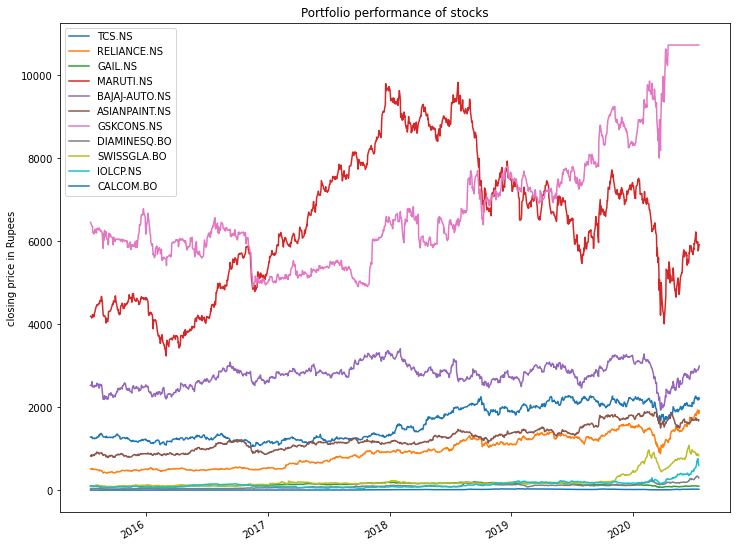

In [5]:
combined_plot_graphs(my_stocks)

### Individual stock performance

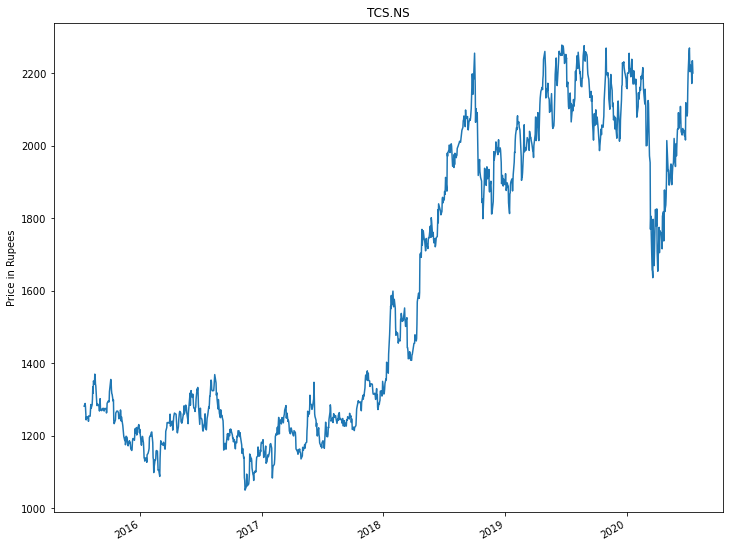

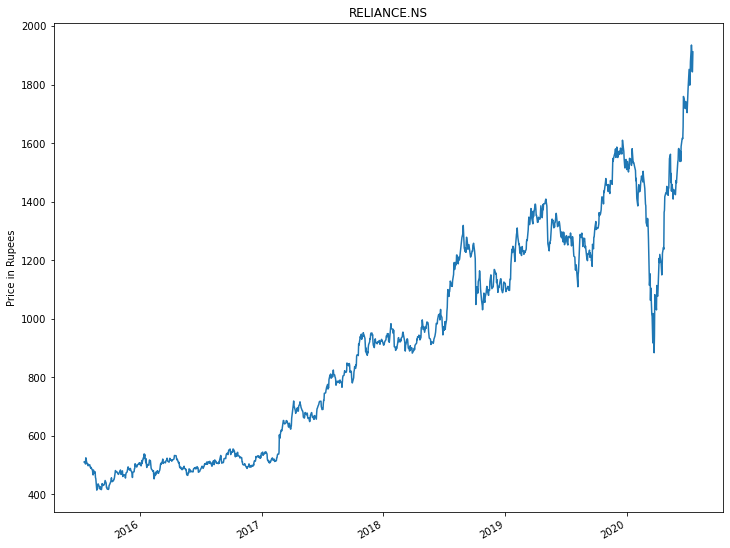

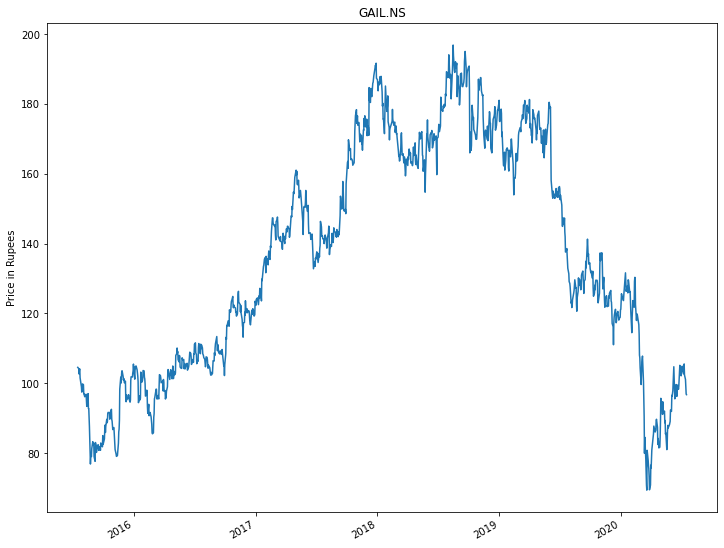

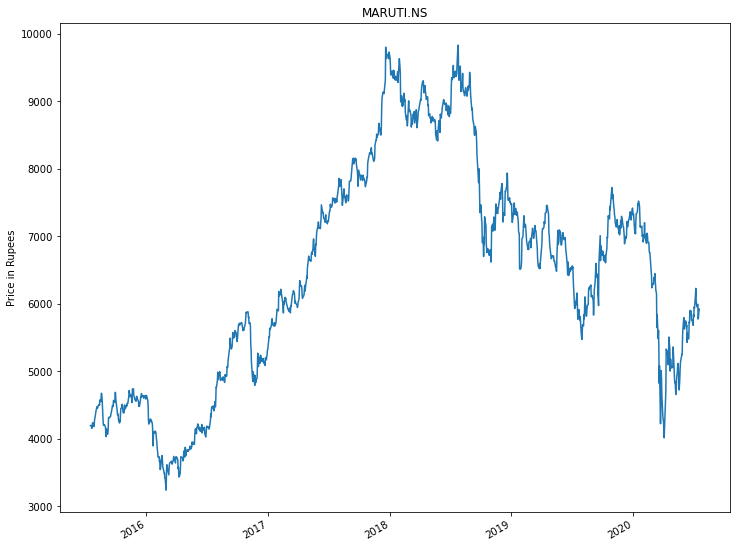

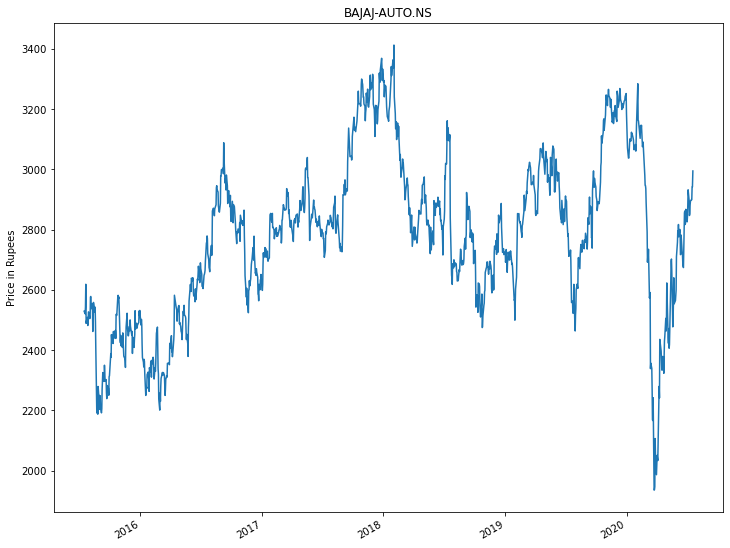

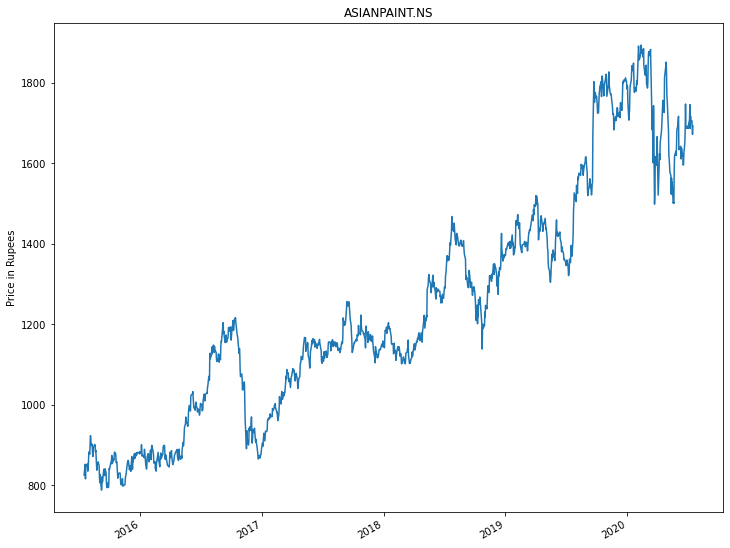

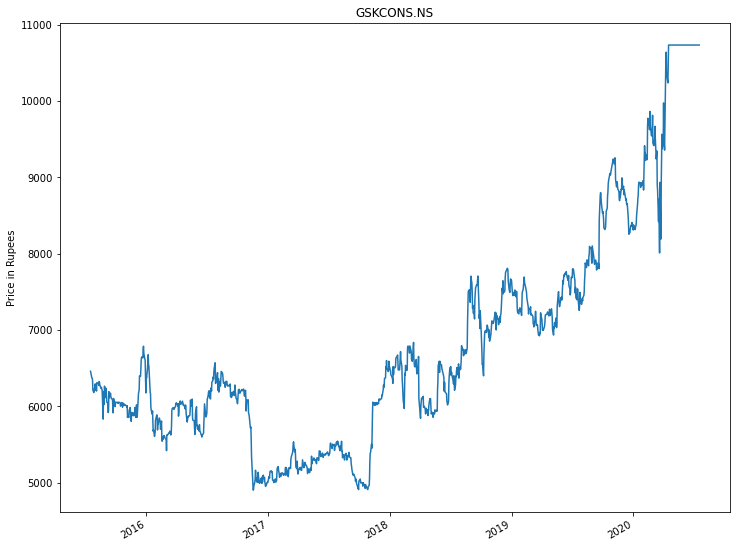

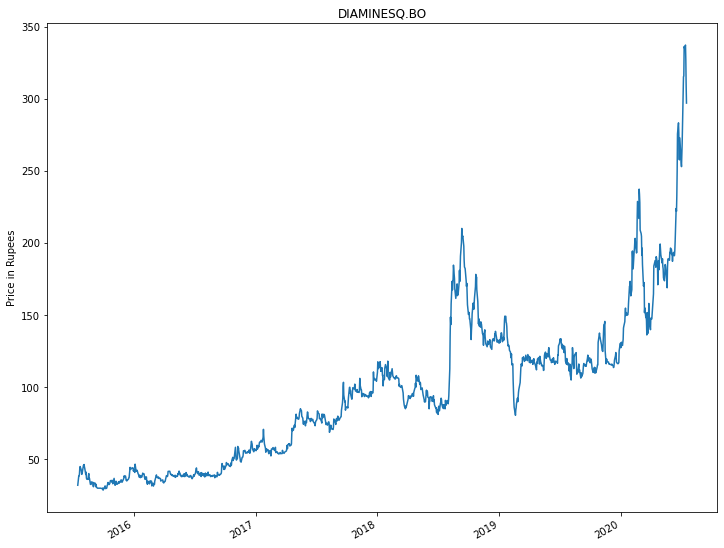

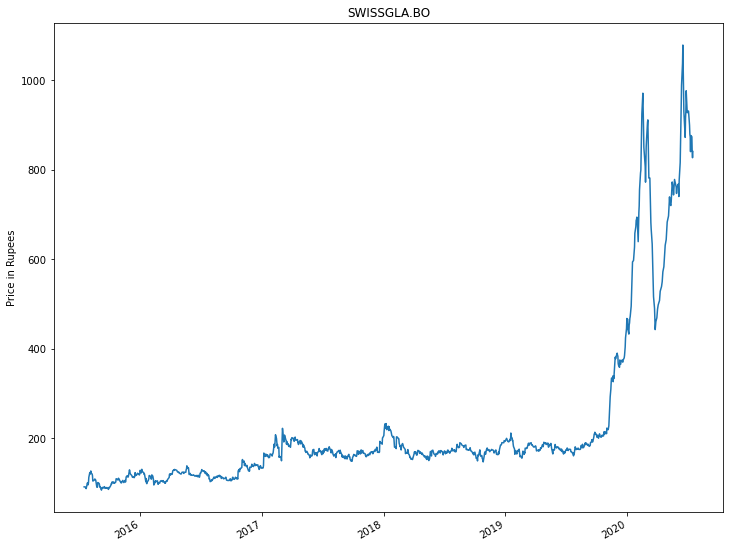

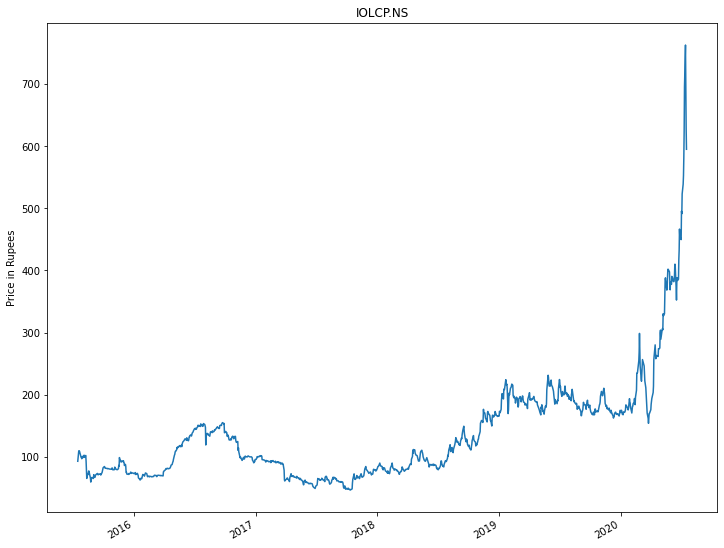

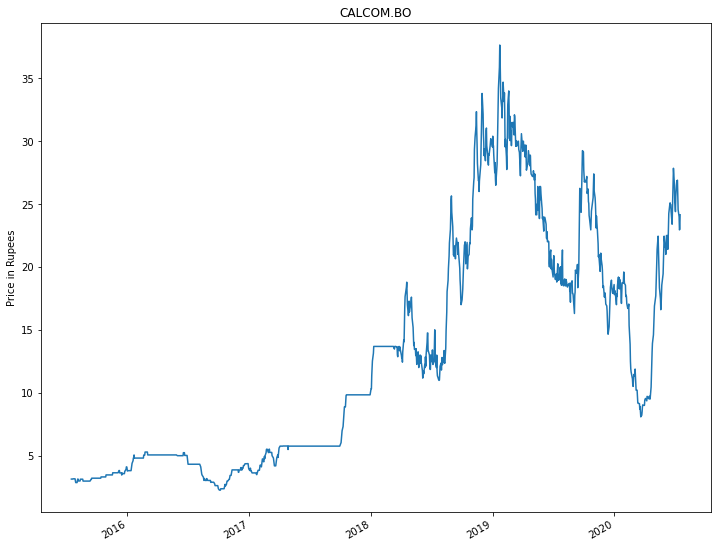

In [6]:
plot_graphs(my_stocks)

### Calculation of simple returns for each of the stocks
* Here the period is set a 1, but if we want monthly stock returns, we can change this number to 30, hence this number can be varied, based on the requirement

In [7]:
# calculate the simple returns 
daily_simple_returns = my_stocks.pct_change(periods=1)
daily_simple_returns

,TCS.NS,RELIANCE.NS,GAIL.NS,MARUTI.NS,BAJAJ-AUTO.NS,ASIANPAINT.NS,GSKCONS.NS,DIAMINESQ.BO,SWISSGLA.BO,IOLCP.NS,CALCOM.BO
2015-07-17 09:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-20 09:15:00,0.005748,0.002995,-0.003538,-0.004042,-0.003360,0.032590,-0.011000,0.199688,-0.002188,0.179225,0.000000
2015-07-21 09:15:00,-0.006878,-0.016550,-0.014779,-0.005555,0.008727,-0.042532,-0.002505,0.000000,-0.009320,-0.013236,0.000000
2015-07-22 09:15:00,-0.013016,0.042270,0.011592,0.009223,0.029867,0.033393,-0.000643,0.032510,-0.017709,0.011101,0.006390
2015-07-23 09:15:00,-0.015609,-0.004855,0.002600,0.010236,-0.049582,0.003795,-0.002842,0.093199,-0.014648,-0.018756,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-13 09:15:00,-0.001057,0.030324,-0.012695,0.005575,0.001831,0.001262,0.000000,0.006566,-0.003024,0.096944,-0.022403
2020-07-14 09:15:00,-0.021644,-0.009302,-0.020277,-0.036251,-0.000172,-0.010113,0.000000,-0.030096,-0.040689,-0.089359,-0.043750
2020-07-15 09:15:00,0.028523,-0.038080,-0.021201,0.005120,0.014675,-0.009921,0.000000,-0.055335,-0.013482,-0.095680,0.002179
2020-07-16 09:15:00,0.000381,-0.000325,-0.002063,0.012764,0.000085,0.012891,0.000000,-0.038835,0.016750,-0.052782,0.050000


### Plot individual stocks simple returns

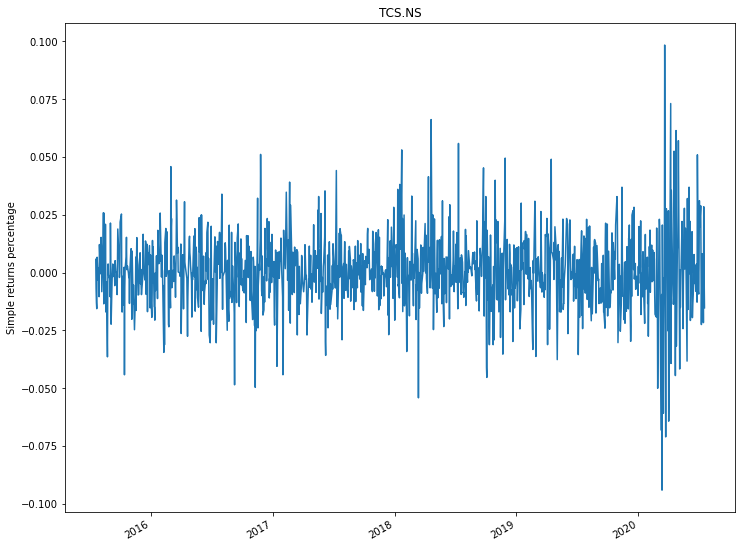

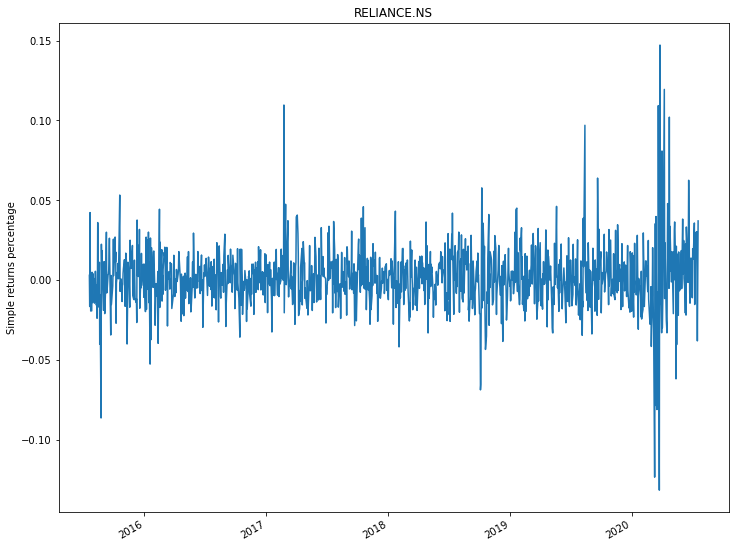

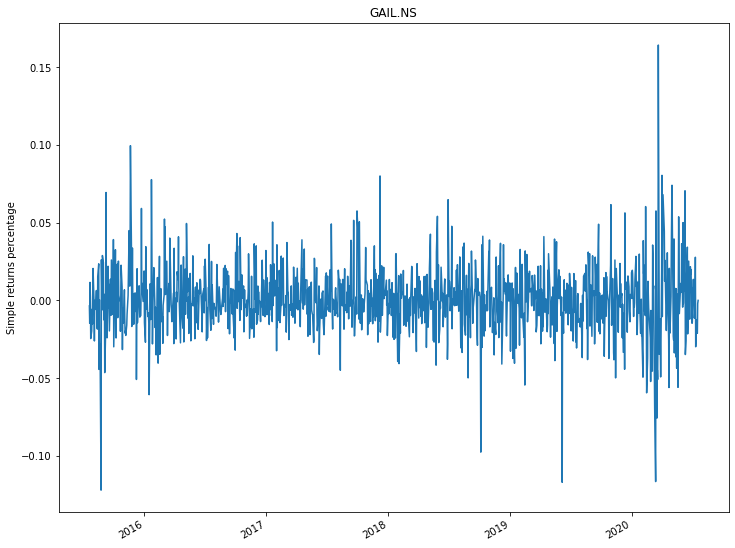

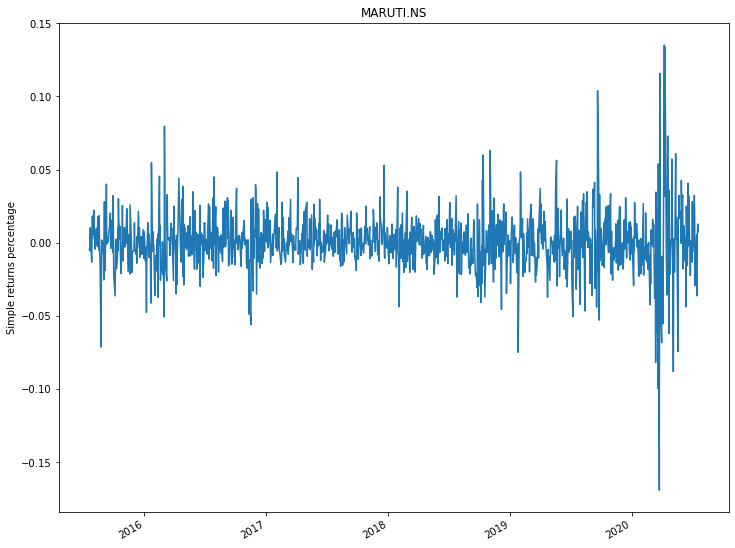

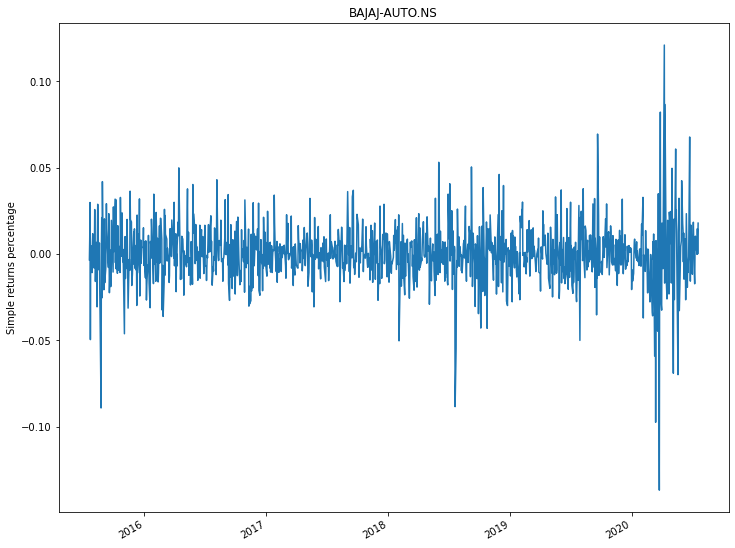

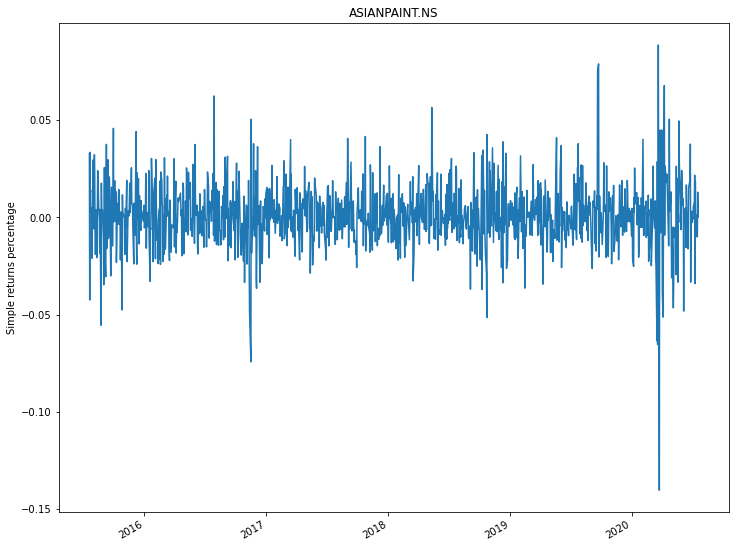

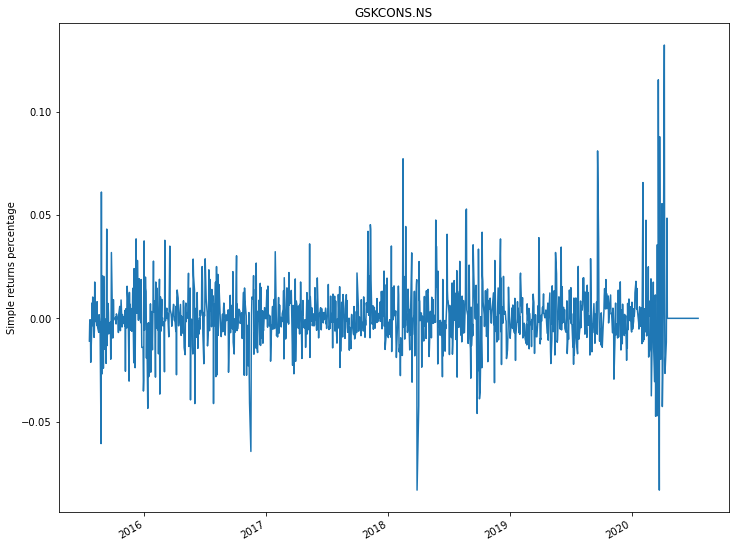

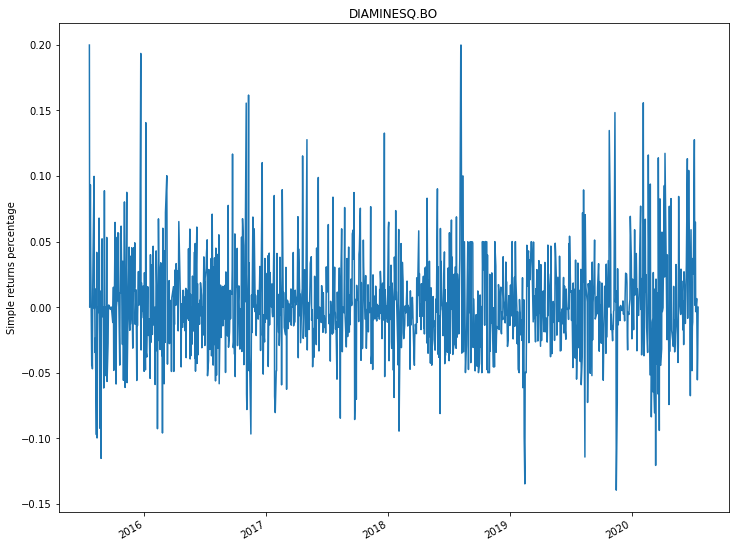

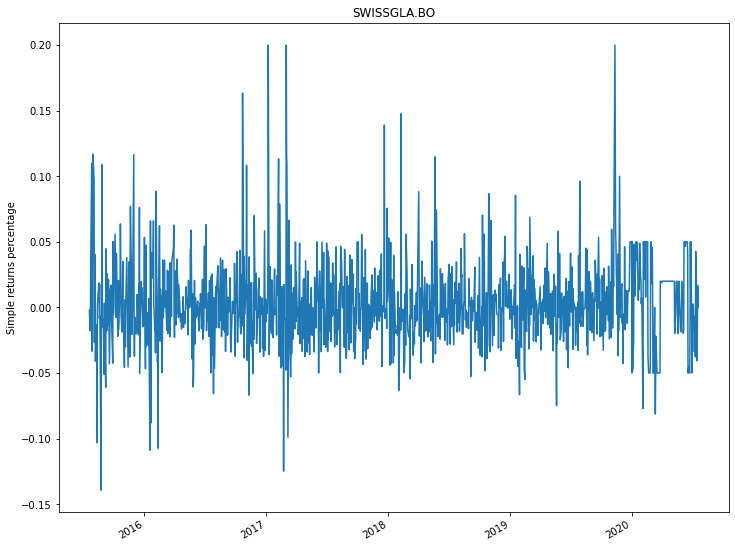

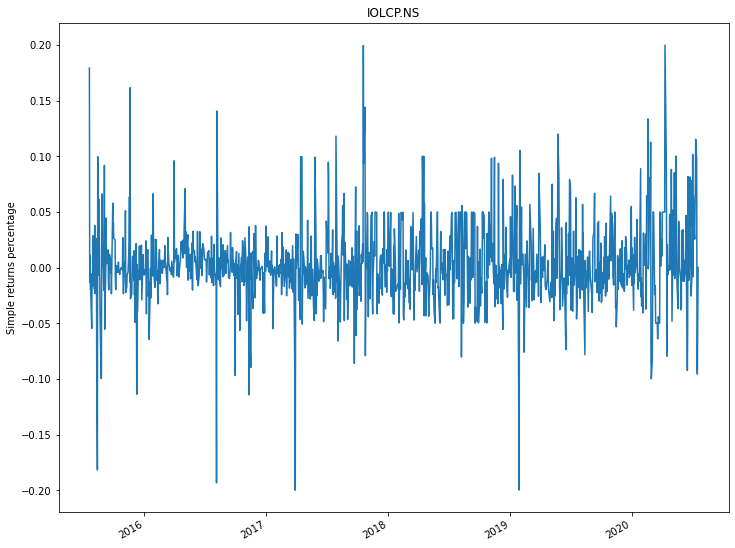

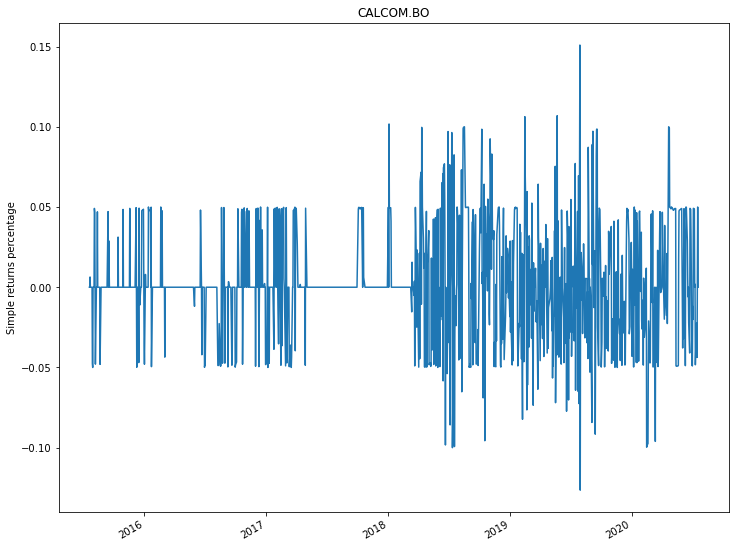

In [8]:
plot_graphs(daily_simple_returns, ylabel='Simple returns percentage')

### Plot the average return for each of the stocks

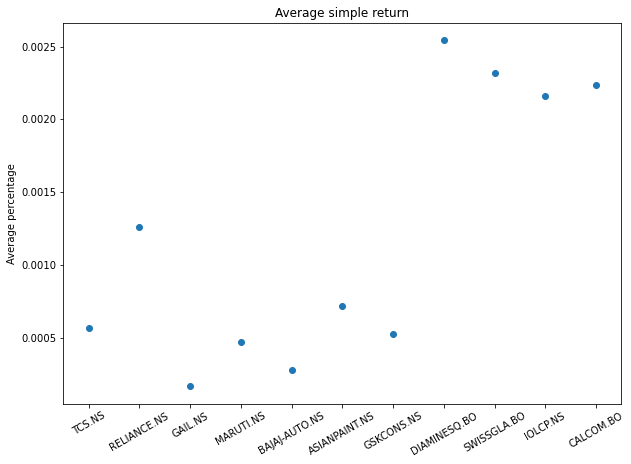

In [9]:
mean_list = [(np.mean(daily_simple_returns.iloc[:,i])) for i in range(len(daily_simple_returns.columns))]
plt.figure(figsize=(10,7))
plt.scatter(x = daily_simple_returns.columns, 
            y = mean_list)
plt.xticks(rotation = 30)
plt.ylabel("Average percentage")
plt.title('Average simple return')
plt.show()

In [10]:
# Show the stocks correlation

daily_simple_returns.corr()

,TCS.NS,RELIANCE.NS,GAIL.NS,MARUTI.NS,BAJAJ-AUTO.NS,ASIANPAINT.NS,GSKCONS.NS,DIAMINESQ.BO,SWISSGLA.BO,IOLCP.NS,CALCOM.BO
TCS.NS,1.000000,0.261266,0.168855,0.247742,0.241456,0.180979,0.223891,0.107226,0.070764,0.069429,-0.000706
RELIANCE.NS,0.261266,1.000000,0.338184,0.423544,0.351901,0.377413,0.279905,0.241978,0.099839,0.193334,0.078590
GAIL.NS,0.168855,0.338184,1.000000,0.269148,0.286414,0.253480,0.171209,0.201739,0.138075,0.140748,0.070649
MARUTI.NS,0.247742,0.423544,0.269148,1.000000,0.500377,0.465889,0.268549,0.254087,0.096562,0.218555,-0.023028
BAJAJ-AUTO.NS,0.241456,0.351901,0.286414,0.500377,1.000000,0.365069,0.244663,0.182675,0.126892,0.195846,0.030756
ASIANPAINT.NS,0.180979,0.377413,0.253480,0.465889,0.365069,1.000000,0.322965,0.170928,0.084278,0.167078,-0.030267
GSKCONS.NS,0.223891,0.279905,0.171209,0.268549,0.244663,0.322965,1.000000,0.135755,0.014813,0.043583,-0.059803
DIAMINESQ.BO,0.107226,0.241978,0.201739,0.254087,0.182675,0.170928,0.135755,1.000000,0.171344,0.249697,0.052997
SWISSGLA.BO,0.070764,0.099839,0.138075,0.096562,0.126892,0.084278,0.014813,0.171344,1.000000,0.155423,0.036645
IOLCP.NS,0.069429,0.193334,0.140748,0.218555,0.195846,0.167078,0.043583,0.249697,0.155423,1.000000,0.012768


In [11]:
# show the corvariance matrix for simple returns
daily_simple_returns.cov()

,TCS.NS,RELIANCE.NS,GAIL.NS,MARUTI.NS,BAJAJ-AUTO.NS,ASIANPAINT.NS,GSKCONS.NS,DIAMINESQ.BO,SWISSGLA.BO,IOLCP.NS,CALCOM.BO
TCS.NS,2.565867e-04,0.000081,0.000058,0.000078,0.000065,0.000047,0.000055,0.000066,0.000037,0.000040,-3.826866e-07
RELIANCE.NS,8.067732e-05,0.000372,0.000140,0.000160,0.000114,0.000118,0.000083,0.000180,0.000062,0.000134,5.124137e-05
GAIL.NS,5.824006e-05,0.000140,0.000464,0.000114,0.000104,0.000088,0.000057,0.000167,0.000096,0.000109,5.145208e-05
MARUTI.NS,7.794592e-05,0.000160,0.000114,0.000386,0.000165,0.000148,0.000081,0.000192,0.000061,0.000155,-1.529788e-05
BAJAJ-AUTO.NS,6.512724e-05,0.000114,0.000104,0.000165,0.000284,0.000100,0.000063,0.000118,0.000069,0.000119,1.751626e-05
ASIANPAINT.NS,4.693457e-05,0.000118,0.000088,0.000148,0.000100,0.000262,0.000080,0.000107,0.000044,0.000097,-1.657395e-05
GSKCONS.NS,5.517763e-05,0.000083,0.000057,0.000081,0.000063,0.000080,0.000237,0.000080,0.000007,0.000024,-3.111962e-05
DIAMINESQ.BO,6.614448e-05,0.000180,0.000167,0.000192,0.000118,0.000107,0.000080,0.001483,0.000213,0.000346,6.902875e-05
SWISSGLA.BO,3.652077e-05,0.000062,0.000096,0.000061,0.000069,0.000044,0.000007,0.000213,0.001038,0.000180,3.993239e-05
IOLCP.NS,4.007467e-05,0.000134,0.000109,0.000155,0.000119,0.000097,0.000024,0.000346,0.000180,0.001298,1.556114e-05


* Higher the variance in the above chart, higher the risk and higher may be the reward
* Effecient frontier tries to maximum return versus the degree of risk for overall portfolio.

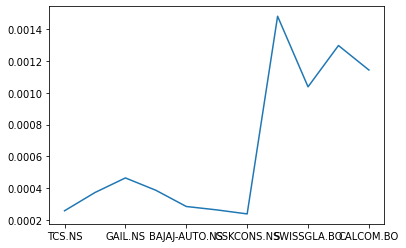

In [12]:
daily_simple_returns.var().plot()

Text(0.5, 1.0, 'Stock volatility')

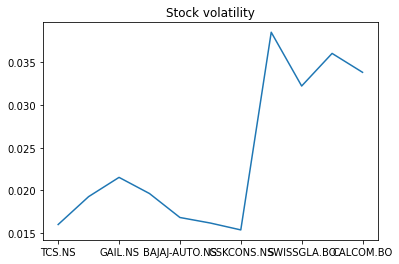

In [13]:
# Standard deviation for daily simple returns

daily_simple_returns.std().plot()
plt.title("Stock volatility")

### calculate the expected portfolio daily returns

In [14]:
randomWeights = np.array(np.repeat(1/numAssets,numAssets))

print("Expected return from this portfolio is : {}".format(np.sum(daily_simple_returns.mean() * randomWeights)))

Expected return from this portfolio is : 0.0012046565725577917


In [15]:
yearly_simple_returns = my_stocks.pct_change(periods=253)
print("Expected return from this portfolio for every year is : {}".format(np.sum(yearly_simple_returns.mean() * randomWeights)))

Expected return from this portfolio for every year is : 0.3143724579625686


In [16]:
# calculate the growth of the investment
daily_cumulative = (daily_simple_returns + 1).cumprod()
daily_cumulative

,TCS.NS,RELIANCE.NS,GAIL.NS,MARUTI.NS,BAJAJ-AUTO.NS,ASIANPAINT.NS,GSKCONS.NS,DIAMINESQ.BO,SWISSGLA.BO,IOLCP.NS,CALCOM.BO
2015-07-17 09:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-20 09:15:00,1.005748,1.002995,0.996462,0.995958,0.996640,1.032590,0.989000,1.199688,0.997812,1.179225,1.000000
2015-07-21 09:15:00,0.998830,0.986395,0.981735,0.990425,1.005337,0.988672,0.986523,1.199688,0.988512,1.163617,1.000000
2015-07-22 09:15:00,0.985829,1.028090,0.993115,0.999559,1.035363,1.021686,0.985888,1.238690,0.971007,1.176534,1.006390
2015-07-23 09:15:00,0.970441,1.023099,0.995697,1.009790,0.984028,1.025563,0.983086,1.354134,0.956783,1.154467,1.006390
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-13 09:15:00,1.731399,3.787805,0.966816,1.428297,1.146494,2.066453,1.661599,10.522621,9.559081,8.209365,7.667732
2020-07-14 09:15:00,1.693925,3.752569,0.947212,1.376520,1.146297,2.045554,1.661599,10.205928,9.170131,7.475780,7.332268
2020-07-15 09:15:00,1.742240,3.609670,0.927130,1.383568,1.163118,2.025260,1.661599,9.641186,9.046499,6.760495,7.348243
2020-07-16 09:15:00,1.742903,3.608496,0.925218,1.401228,1.163217,2.051369,1.661599,9.266771,9.198031,6.403660,7.715655


Text(0.5, 1.0, 'Daily Cumulative Simple Returns')

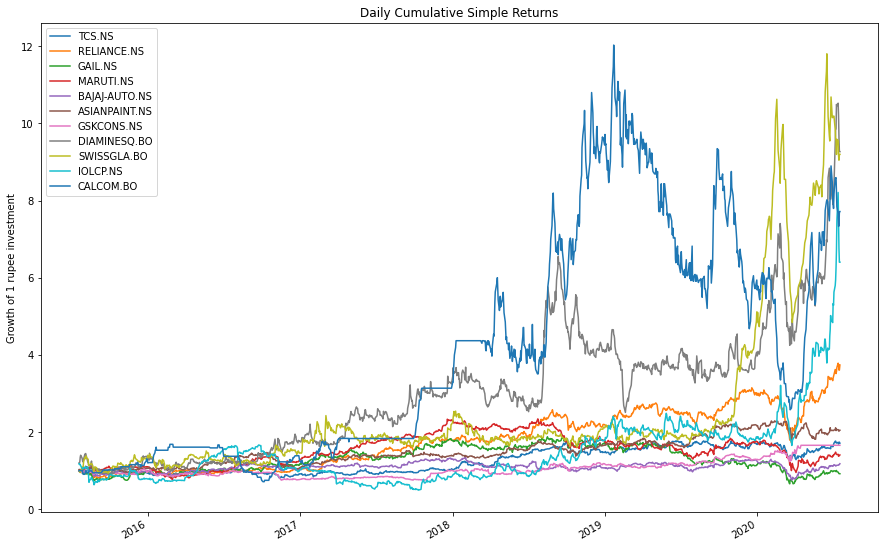

In [17]:
# plot growth of investment
daily_cumulative.plot(figsize=(15,10))
plt.ylabel('Growth of 1 rupee investment')
plt.title('Daily Cumulative Simple Returns')

* Results in the above data are not clear
* Hence we will sort the columns based on the highest return on investment and plot the top 5 companies giving return on investment as of today

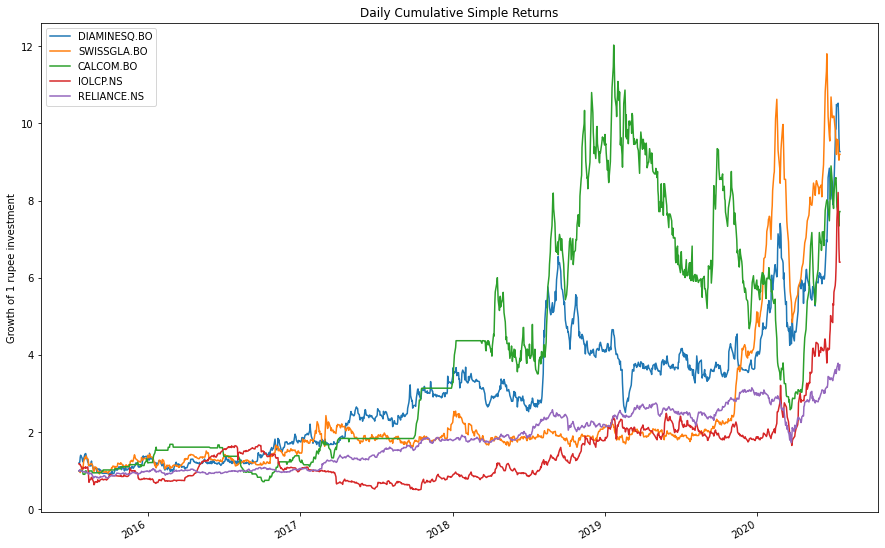

DIAMINESQ.BO    9.266771
SWISSGLA.BO     9.198031
CALCOM.BO       7.715655
IOLCP.NS        6.403660
RELIANCE.NS     3.742194
Name: 2020-07-17 15:30:00, dtype: float64


In [18]:
top_returns = daily_cumulative.iloc[:,np.argsort(-daily_cumulative.iloc[-1,:])]
top_returns.iloc[:,:5].plot(figsize=(15,10))
plt.ylabel('Growth of 1 rupee investment')
plt.title('Daily Cumulative Simple Returns')
plt.show()

print(top_returns.iloc[-1,:5])

* If we had invested one rupee on any of the stocks 5 year back, the highest return would be from Diamesq as of today.
* If we were ready to exit in around 2018, then may be Calcom, also would give a similar return